In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import chart_studio.plotly as py
#import plotly.graph_objs as go
import warnings 
warnings.filterwarnings('ignore')
#from wordcloud import WordCloud
from wordcloud import WordCloud

In [148]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [149]:
from scipy.stats import shapiro , kruskal

## Understanding Data

In [150]:
# Reading Purchase Behavior file
df_purchase = pd.read_csv('PurchaseBehaviour.csv')
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [151]:
# Checking Datatypes of existing Features
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [152]:
# Checking Shape Purchase Behavior Dataframe
df_purchase.shape

(72637, 3)

In [153]:
#LIFESTAGE Column
df_purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [154]:
#PREMIUM_CUSTOMER Column
df_purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [155]:
#Reading Transaction file
df_trans = pd.read_csv('Transactions.csv')
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [156]:
# Checking Datatypes of existing Features
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [157]:
# Checking Shape Transaction Dataframe
df_trans.shape

(264836, 8)

In [158]:
# STORE_NBR Column
df_trans['STORE_NBR'].nunique()

272

In [159]:
# LYLTY_CARD_NBR Column
df_trans['LYLTY_CARD_NBR'].nunique()

72637

In [160]:
# TXN_ID
df_trans['TXN_ID'].nunique()

263127

In [161]:
# Checking Value Counts of each transaction
df_trans['TXN_ID'].value_counts()

102237    3
228741    3
108462    3
230356    3
222775    3
         ..
109471    1
107422    1
113565    1
111516    1
2049      1
Name: TXN_ID, Length: 263127, dtype: int64

In [162]:
df_trans['TXN_ID'].value_counts()[:20]

102237    3
228741    3
108462    3
230356    3
222775    3
211119    3
1162      3
260434    2
64174     2
126104    2
251171    2
187520    2
130290    2
70106     2
210295    2
211981    2
64266     2
224481    2
225536    2
234788    2
Name: TXN_ID, dtype: int64

#### Inference : there are about 1000 non unique Taxn id, which suggests that multiple items were bought at one transaction.

In [163]:
# PROD_NBR
df_trans['PROD_NBR'].nunique()

114

In [164]:
# Checking Value Counts of each Product Number
df_trans['PROD_NBR'].value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

In [165]:
# PROD_NAME
df_trans['PROD_NAME'].nunique()

114

In [166]:
# Checking Value Counts of each PROD_NAME
df_trans['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [167]:
# TOP 20 Product Name (In no particular Order)
df_trans['PROD_NAME'].head(20)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
Name: PROD_NAME, dtype: object

In [168]:
# Checking how many Products have 'Chips' in their Name

l = []
for i in df_trans['PROD_NAME']:
    for j in list(i.lower().split()):
        if j=='chip' or j=='chips' or j=='chi':
            l.append(i)
            break

In [169]:
# Creating Dataframe of Products having 'Chips' in their name

chips = pd.DataFrame(l)
chips.head()

,0
0,Natural Chip Compny SeaSalt175g
1,Smiths Crinkle Cut Chips Chicken 170g
2,Smiths Chip Thinly S/Cream&Onion 175g
3,Smiths Crinkle Chips Salt & Vinegar 330g
4,Doritos Corn Chip Mexican Jalapeno 150g


In [170]:
# Checking Value Counts
chips[0].value_counts()

Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Cobs Popd Sea Salt  Chips 110g              3265
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Doritos Corn Chips  Cheese Supreme 170g     3217
Doritos Corn Chip Mexican Jalapeno 150g     3204
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Doritos Corn Chip Southern Chicken 150g     3172
Doritos Corn Chips  Nacho Cheese 170g       3160
Cobs Popd Sour Crm  &Chives Chips 110g      3159
Doritos Corn Chips  Original 170g           3121
Thins Chips Seasonedchicken 175g            3114
Thins Chips Salt &  Vinegar 175g            3103
Smiths Chip Thinly  Cut Original 175g       1614
Natural Chip Co     Tmato Hrb&Spce 175g     1572
WW Supreme Cheese   Corn Chips 200g         1509
WW Original Corn    Chips 200g              1495
Smiths Crinkle Cut  Chips Barbecue 170g     1489
WW Original Stacked Chips 160g              1487
Smiths Crinkle Cut  

In [171]:
# Shape and Unique Values
print(chips.shape[0])
print(chips[0].nunique())

68415
30


In [172]:
# DATE

## Data Preprocessing

In [173]:
# Printing top five records of Purchase Dataframe
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [174]:
# Printing top five records of Transaction Dataframe
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [175]:
# Merging the Two dataframes
df = pd.merge(df_purchase,df_trans, on='LYLTY_CARD_NBR')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [176]:
# Checking Datatypes of all the Features in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [177]:
# Checking Shape of Merged Dataframe
df.shape

(264836, 10)

In [178]:
# Checking for Null Values
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [179]:
# Checking Duplicates
df.duplicated().sum()

1

#### We have only One duplicated record in our Datast , we will delete one of the two record

In [180]:
# Deleting Duplicated record while keeping the first one.
df.drop_duplicates(keep='first',inplace=True)

In [181]:
# Checking Again if there's any duplicate
df.duplicated().sum()

0

In [182]:
# Date

In [183]:
# Date feature is not in readable format, Converting it to YYYY-MM-DD format
df['DATE'] = pd.to_datetime(df['DATE'],errors='coerce',unit='d',origin='1900-01-01')

## Feature Engineering 

In [184]:
# Date

In [185]:
# Adding MONTH Column to Merged(Final) Dataframe
import datetime as dt
df['MONTH'] = df['DATE'].dt.strftime('%B %y')

In [186]:
# Checking First five Observation
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,October 18
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,September 18
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,March 19
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,March 19
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,November 18


In [187]:
# Prod_Name

#### We have many anomalies in Product_Name column . Also Packet Size and Brand of the the Product are includede in product name itself .So we will extract brand and packet size from the product Name column and add them as New feature in our Dataframe

In [188]:
# Checking First 20 Observation
df['PROD_NAME'].value_counts()[:20]

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Tyrrells Crisps     Lightly Salted 165g     3174
Name: PROD_NAME, dty

In [189]:
# Checking last 25 Observation
df['PROD_NAME'].value_counts()[90:]

WW D/Style Chip     Sea Salt 200g           1469
Natural Chip        Compny SeaSalt175g      1468
GrnWves Plus Btroot & Chilli Jam 180g       1468
WW Crinkle Cut      Chicken 175g            1467
Smiths Thinly       Swt Chli&S/Cream175G    1461
Smiths Crinkle Cut  Chips Original 170g     1461
Natural ChipCo      Hony Soy Chckn175g      1460
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Smiths Crinkle Cut  Salt & Vinegar 170g     1455
RRD Steak &         Chimuchurri 150g        1455
Cheezels Cheese Box 125g                    1454
Smith Crinkle Cut   Bolognese 150g          1451
Doritos Salsa       Medium 300g             1449
Cheetos Puffs 165g                          1448
Thins Chips         Originl saltd 175g      1441
Smiths Chip Thinly  CutSalt/Vinegr175g      1440
Smiths Crinkle Cut  French OnionDip 150g    1438
Red Rock Deli Chikn&Garlic Aioli 150g       1434
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   

In [190]:
# Creating Separarte Feature for Size
sizes = []
for i in df['PROD_NAME']:
    size = []
    for j in i:
        if j.isnumeric():
            size.append(j)
    n = ''.join(size)
    sizes.append(int(n))
    
df['Size in Grams'] = sizes

In [191]:
# Creating Separarte Feature for brand
brand = []
for i in df['PROD_NAME']:
    l = i.split(' ')[0]
    brand.append(l)

In [192]:
# Saving the list'brand' created above in panda Series
s= pd.Series(brand)

In [193]:
s.value_counts()

Kettle        41288
Smiths        28859
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
dtype: int64

In [194]:
# Total Sum
s.value_counts().values.sum()

264835

#### Spelling Mistakes or incomplete Brand Name:

Old - Old El Paso

red, RRD is Red Rock Deli

Dorito and Doritos are same

Infzns is Infuzions

Smith and Smiths are same

Snbts is Sunbites

All the Burger Rings are of Smiths

GrnWves are Grain Waves which is a Sunbites product(Change Spelling and Brand)

NCC means Natural Chips Company (Natural and NCC are same)

French Fries Potato Chips comes under brand Thins

In [195]:
# Brand Old El Paso
for i in df['PROD_NAME']:
    l = i.split(' ')[0]
    if l == 'Old':
        print(i)
        break

Old El Paso Salsa   Dip Tomato Med 300g


In [196]:
# Brand Burger Rings ( Actual Brand Smith's)
for i in df['PROD_NAME']:
    l = i.split(' ')[0]
    if l == 'Burger':
        print(i)

Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rin

Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rin

Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rings 220g
Burger Rin

In [197]:
# Brand GrnWves ( Actual Brand Sunbites , also spelling mistake)
for i in df['PROD_NAME']:
    l = i.split(' ')[0]
    if l == 'GrnWves':
        print(i)
    

GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus

GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus

GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus

GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus Btroot & Chilli Jam 180g
GrnWves Plus

In [198]:
# French Fries
for i in df['PROD_NAME']:
    l = i.split(' ')[0]
    if l == 'French':
        print(i)

French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French F

French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French F

French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French F

French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French Fries Potato Chips 175g
French F

In [199]:
# Saving Brands in anothe variable 
df['Brand'] = s

In [200]:
# Checking Length
len(s)

264835

In [201]:
# Correcting spelling mistakes and replacing it
df['Brand'] = df['Brand'].replace({'Old':'Old El Paso', 'RRD':'Red Rock Deli', 'Red':'Red Rock Deli', 'Dorito': 'Doritos' , 
                                   'Infzns':'Infuzions' , 'Smith': "Smith's", 'Smiths':"Smith's" , 'Snbts': 'Sunbites',
                                  'Burger':"Smith's", 'GrnWves':'Sunbites' , 'Natural':'Natural Chip Co' , 
                                 'NCC': 'Natural Chip Co', 'French':'Thins', 'Woolworths':"WW"})

In [202]:
# Checking Value Count of corrected Brand Names
df['Brand'].value_counts()

Kettle             41288
Smith's            33386
Doritos            28147
Pringles           25102
Red Rock Deli      17778
Thins              15493
WW                 14757
Infuzions          14201
Cobs                9693
Tostitos            9471
Twisties            9454
Old El Paso         9324
Natural Chip Co     7469
Tyrrells            6442
Grain               6272
Cheezels            4603
CCs                 4551
Sunbites            4476
Cheetos             2927
Name: Brand, dtype: int64

In [203]:
# Checking total Brand 
len(df['Brand'].value_counts().index)

19

In [204]:
# Checking total Observation of corrected brand Brand 
df['Brand'].value_counts().values.sum()

264834

In [205]:
# First five Observation from Dataframe
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,October 18,175,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,September 18,150,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,March 19,210,Grain
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,March 19,175,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,November 18,160,WW


In [206]:
# Checking Shape after adding Corrected Brand Names
df.shape

(264835, 13)

In [207]:
#Checking Nulls
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
MONTH               0
Size in Grams       0
Brand               1
dtype: int64

In [208]:
# We have one Null value in Brand Column we created , Dropping it.
df.dropna(inplace=True)

In [209]:
df.shape

(264834, 13)

In [210]:
# function to clean the PROD_NAME column and make names consistent

def string_cleaning(dataframe): 
    dataframe['PROD_NAME'] = (dataframe['PROD_NAME'].str.replace(r'[0-9]+[g|G]', '').
                              str.strip().str.replace(r'\s{2,}', ' ').str.lower())
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('dorito ', 'doritos ')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('french fries', 'french_fries')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('grnwves', 'grain_waves')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('grain waves', 'grain_waves')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('infzns', 'infuzions')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('natural chip co', 'natural_chipco')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('natural chip compny', 'natural_chipco')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('natural chipco', 'natural_chipco')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('ncc', 'natural_chipco')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('natural_chipcompny', 'natural_chipco')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('red rock deli', 'red_rock_deli')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('rrd', 'red_rock_deli')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('smith ', 'smiths ')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('snbts', 'sunbites')
    dataframe['PROD_NAME'] = dataframe['PROD_NAME'].str.replace('woolworths', 'ww')

    return dataframe

df = string_cleaning(df)
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,natural_chipco seasalt,2,6.0,October 18,175,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,red_rock_deli chikn&garlic aioli,1,2.7,September 18,150,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,grain_waves sour cream&chives,1,3.6,March 19,210,Grain
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,natural_chipco hony soy chckn,1,3.0,March 19,175,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,ww original stacked chips,1,1.9,November 18,160,WW


In [211]:
# Adding New Column as Product Price
df['Product Price'] = df['TOT_SALES'] / df['PROD_QTY']

In [212]:
# Statistical Description
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Size in Grams,Product Price
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.00000
mean,1.355411e+05,135.080394,1.351580e+05,56.583354,1.907308,7.304189,182.426475,3.82462
std,8.046281e+04,76.784396,7.813303e+04,32.826659,0.643656,3.083226,64.326799,1.10952
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000,1.32000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000,3.00000
50%,1.303575e+05,130.000000,1.351375e+05,56.000000,2.000000,7.400000,170.000000,3.80000
75%,2.030940e+05,203.000000,2.027008e+05,85.000000,2.000000,9.200000,175.000000,4.60000
max,2.370961e+06,272.000000,2.415841e+06,114.000000,200.000000,650.000000,380.000000,6.50000


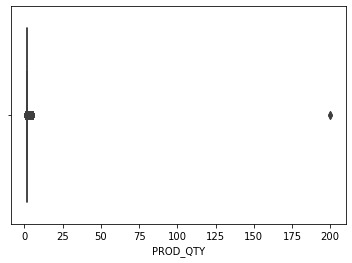

In [213]:
# Product Quantity
sns.boxplot(df['PROD_QTY'])
plt.show()

In [214]:
df[df['PROD_QTY']==200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
221625,226000,OLDER FAMILIES,Premium,2018-08-21,226,226201,4,doritos corn chp supreme,200,650.0,August 18,380,Doritos,3.25
221626,226000,OLDER FAMILIES,Premium,2019-05-22,226,226210,4,doritos corn chp supreme,200,650.0,May 19,380,Smith's,3.25


In [215]:
df[df['LYLTY_CARD_NBR']==226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
221625,226000,OLDER FAMILIES,Premium,2018-08-21,226,226201,4,doritos corn chp supreme,200,650.0,August 18,380,Doritos,3.25
221626,226000,OLDER FAMILIES,Premium,2019-05-22,226,226210,4,doritos corn chp supreme,200,650.0,May 19,380,Smith's,3.25


In [216]:
df[df['PROD_QTY']>5]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
221625,226000,OLDER FAMILIES,Premium,2018-08-21,226,226201,4,doritos corn chp supreme,200,650.0,August 18,380,Doritos,3.25
221626,226000,OLDER FAMILIES,Premium,2019-05-22,226,226210,4,doritos corn chp supreme,200,650.0,May 19,380,Smith's,3.25


##### There are only two such entries who have bought more than 5 quantity and that too 200 . As both the entries is of the same customer and the time gap between shopping is about 9 month we cay say that this customer may own some shop or something where he sells the product so it is better to offer him some discount to attract more sales. Also we can give some offers on other products as well to attract more sale of Other products.

In [217]:
# Removing those two entries
df = df[df['PROD_QTY']!=200]

In [218]:
# Checking shape of our final Dataframe after all the data preprocessing and feature Engineering
df.shape

(264832, 14)

## Exploratory Data Analysis

In [219]:
# SALES

In [220]:
# Sales Vs Class of Customer

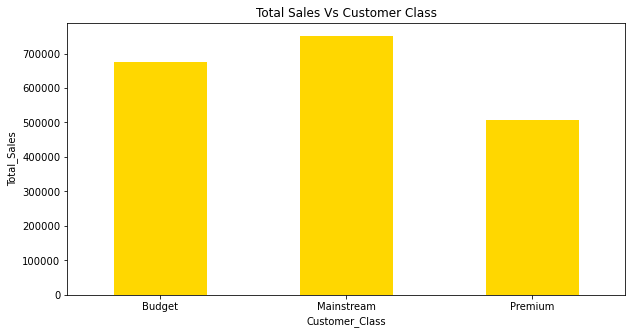

In [221]:
plt.figure(figsize=(10,5))
df.groupby(by='PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='bar' , color='gold' , fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Customer_Class')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Customer Class')
plt.show()

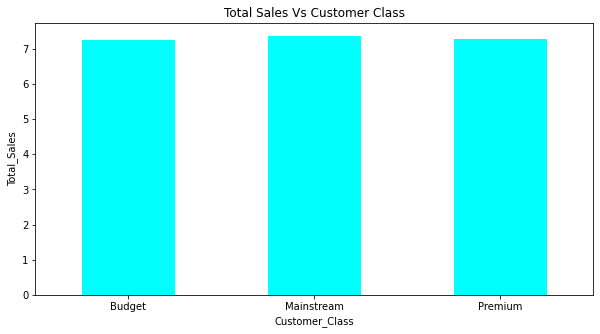

In [222]:
plt.figure(figsize=(10,5))
df.groupby(by='PREMIUM_CUSTOMER')['TOT_SALES'].mean().plot(kind='bar' , color='cyan' , fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Customer_Class')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Customer Class')
plt.show()

In [223]:
df.groupby(by='PREMIUM_CUSTOMER')['TOT_SALES'].mean()

PREMIUM_CUSTOMER
Budget        7.258838
Mainstream    7.361067
Premium       7.263129
Name: TOT_SALES, dtype: float64

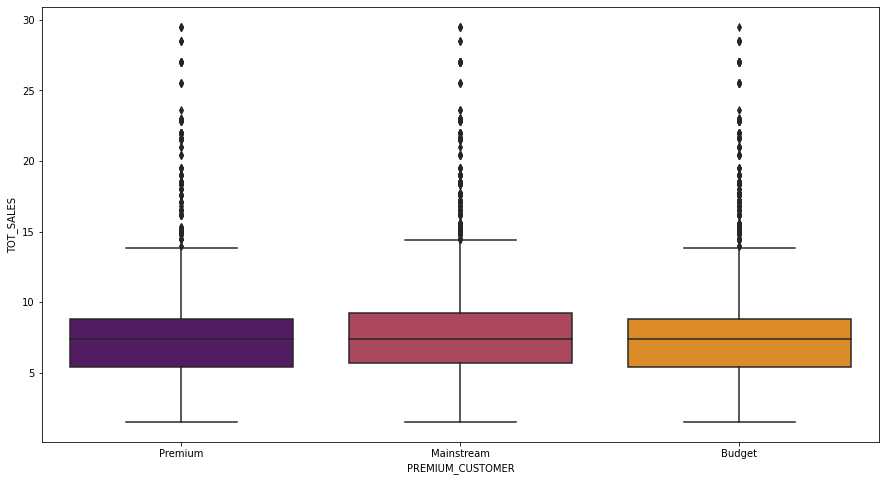

In [224]:
plt.figure(figsize=(15,8))
sns.boxplot(x='PREMIUM_CUSTOMER' , y='TOT_SALES' , data=df ,palette='inferno')
plt.show()

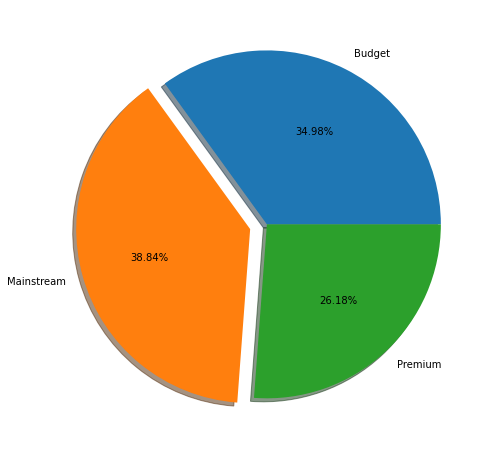

In [225]:
plt.figure(figsize=(15,8))
s = df.groupby(by='PREMIUM_CUSTOMER')['TOT_SALES'].sum() 
plt.pie(x=s.values,labels=s.index,autopct='%.2f%%',explode=[0,0.1,0],shadow=True)
plt.title('')
plt.show()

> From above Analysis, we can conclude that Mainstream Customer class has Maximum contribution to our total Sales followed by Budget and Premium.  .

> When we ploted Sales vs Mean Sales, the observation is quite contradictory to our general understanding of class. As mean Sales of all the classes are nearly equal, we can say that irrespective of the class of customer, all of the classes are spending same on snacks. 

> The above conclusion is further concreted by Boxplot Boxplot

> Mainstream Class's contribution to total sales is about 39%.

In [226]:
# Sales Vs Lifestage of Customer

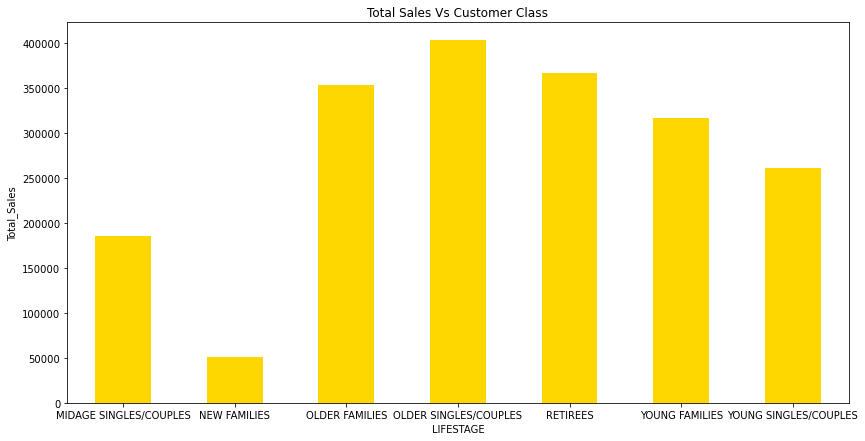

In [227]:
plt.figure(figsize=(14,7))
df.groupby(by='LIFESTAGE')['TOT_SALES'].sum().plot(kind='bar' , color='gold' , fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('LIFESTAGE')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Customer Class')
plt.show()

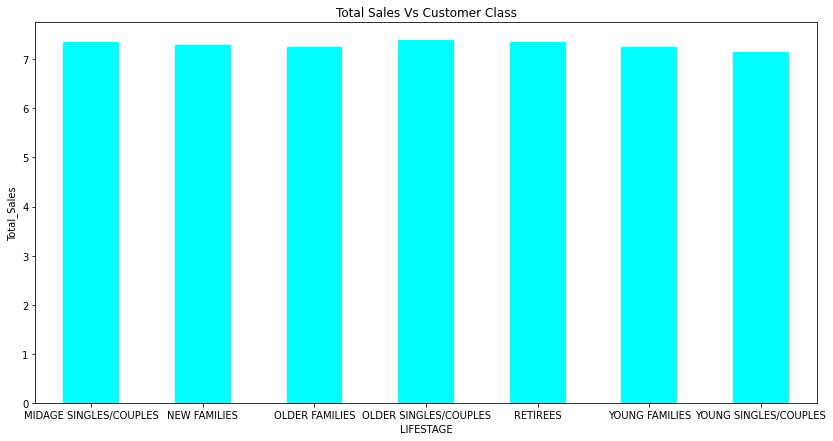

In [228]:
plt.figure(figsize=(14,7))
df.groupby(by='LIFESTAGE')['TOT_SALES'].mean().plot(kind='bar' , color='cyan' , fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('LIFESTAGE')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Customer Class')
plt.show()

In [229]:
df.groupby(by='LIFESTAGE')['TOT_SALES'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    7.357678
NEW FAMILIES              7.289124
OLDER FAMILIES            7.253307
OLDER SINGLES/COUPLES     7.386849
RETIREES                  7.364325
YOUNG FAMILIES            7.252709
YOUNG SINGLES/COUPLES     7.158398
Name: TOT_SALES, dtype: float64

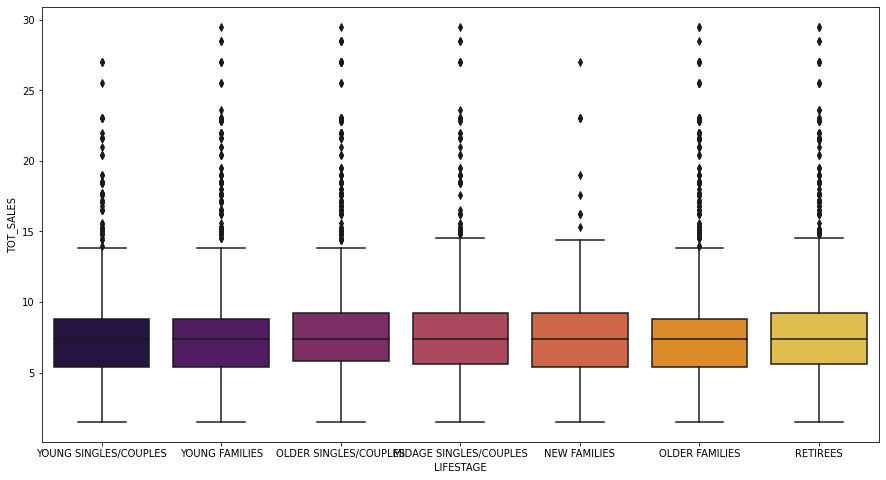

In [230]:
plt.figure(figsize=(15,8))
sns.boxplot(x='LIFESTAGE' , y='TOT_SALES' , data=df ,palette='inferno')
plt.show()

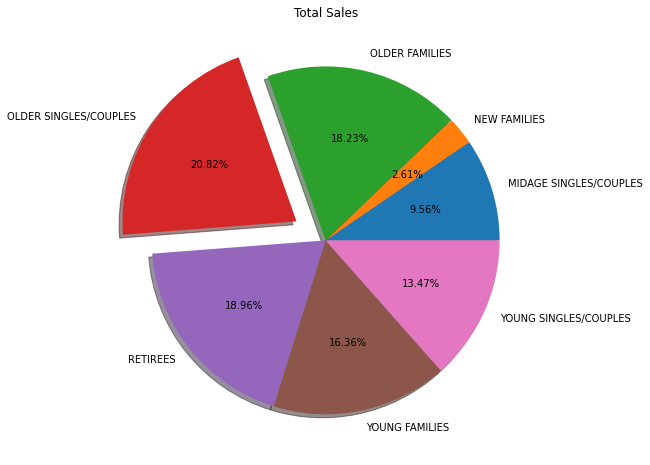

In [231]:
plt.figure(figsize=(15,8))
s = df.groupby(by='LIFESTAGE')['TOT_SALES'].sum()
plt.pie(x=s.values,labels=s.index,autopct='%.2f%%',explode=[0,0,0,0.2,0,0,0] , shadow=True)
plt.title('Total Sales')
plt.show()

In [232]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,natural_chipco seasalt,2,6.0,October 18,175,Natural Chip Co,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,red_rock_deli chikn&garlic aioli,1,2.7,September 18,150,Red Rock Deli,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,grain_waves sour cream&chives,1,3.6,March 19,210,Grain,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,natural_chipco hony soy chckn,1,3.0,March 19,175,Natural Chip Co,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,ww original stacked chips,1,1.9,November 18,160,WW,1.9


In [233]:
pd.crosstab(df.PREMIUM_CUSTOMER,df.Brand)

Brand,CCs,Cheetos,Cheezels,Cobs,Doritos,Grain,Infuzions,Kettle,Natural Chip Co,Old El Paso,Pringles,Red Rock Deli,Smith's,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,
Budget,1668,1034,1636,3288,9731,2141,4911,14241,2782,3199,8623,6494,12063,1695,5489,3286,3251,2195,5430
Mainstream,1675,1097,1717,3851,11241,2490,5573,16305,2659,3753,9870,6501,12449,1591,5924,3734,3763,2577,5217
Premium,1208,796,1250,2554,7174,1641,3717,10742,2028,2372,6609,4783,8873,1190,4080,2451,2440,1670,4110


> Older Singles/Couples are contributing most the total sales followed by Older Families and Retires whereas Young Families contribute least to the tatal Sales

> Older Singles/Couples are contributing about 21% to the tatal sales followed by 19% and 18% by Older Families and Retires
respectively.

In [234]:
# Sales Vs Brand

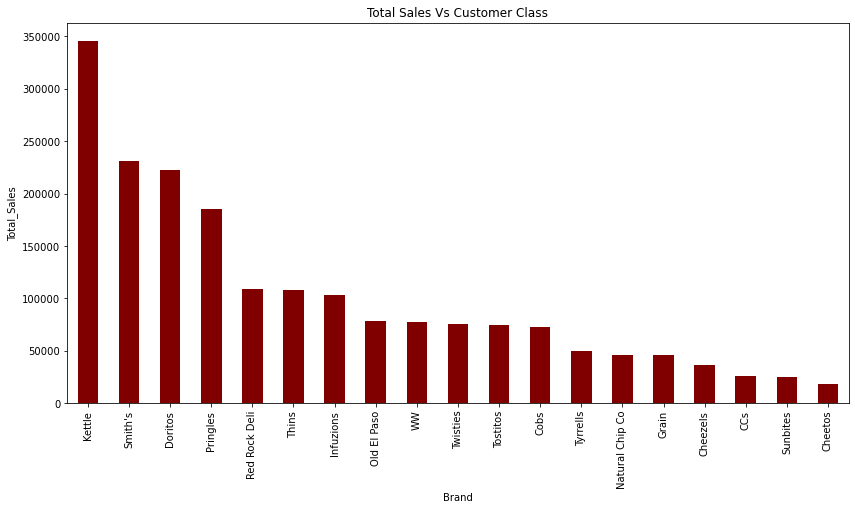

In [235]:
plt.figure(figsize=(14,7))
df.groupby(by='Brand')['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='bar' , color='maroon' , fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Customer Class')
plt.show()

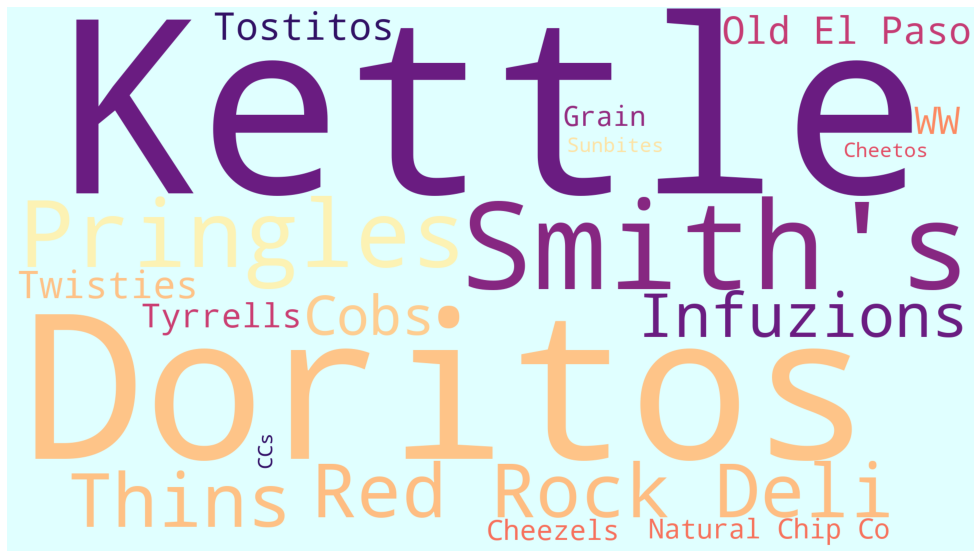

In [236]:
text = dict(round(df.groupby(by='Brand')['TOT_SALES'].sum()/sum(df['TOT_SALES']),2))
plt.subplots(figsize=(20,10))
wc = WordCloud(
                          background_color='lightcyan',
                          width=1920,
                          height=1080,
                        colormap='magma'
                         )
wc.fit_words(text)
plt.imshow(wc)
plt.axis('off')
plt.savefig('players.png')
plt.show()

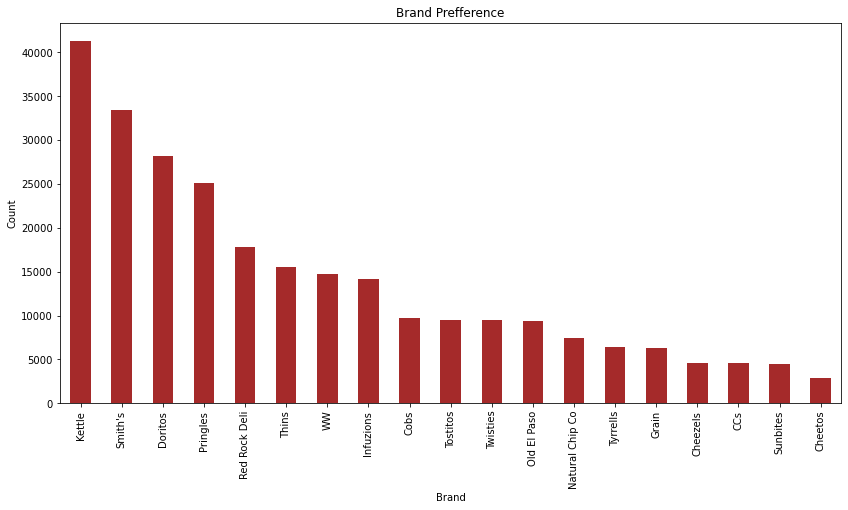

In [237]:
plt.figure(figsize=(14,7))
df.groupby(by='Brand')['TOT_SALES'].count().sort_values(ascending=False).plot(kind='bar' , color='brown' , fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Prefference')
plt.show()

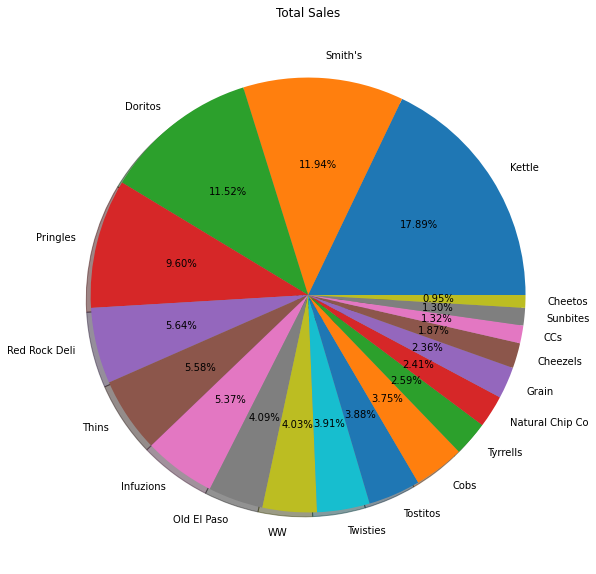

In [238]:
plt.figure(figsize=(15,10))
s = df.groupby(by='Brand')['TOT_SALES'].sum().nlargest(19) 
plt.pie(x=s.values,labels=s.index,autopct='%.2f%%', shadow=True)
plt.title('Total Sales')
plt.show()

> The Most Preffered brand is Kettle which is also has the Highest sales amongst others while Cheetos has the lowest sales.

> From the Pie Chart, it can be seen than around 50% of the total sales comes from four brands namely Kettle,Smith's,Doritoos,Pringles

In [239]:
# Sales vs size

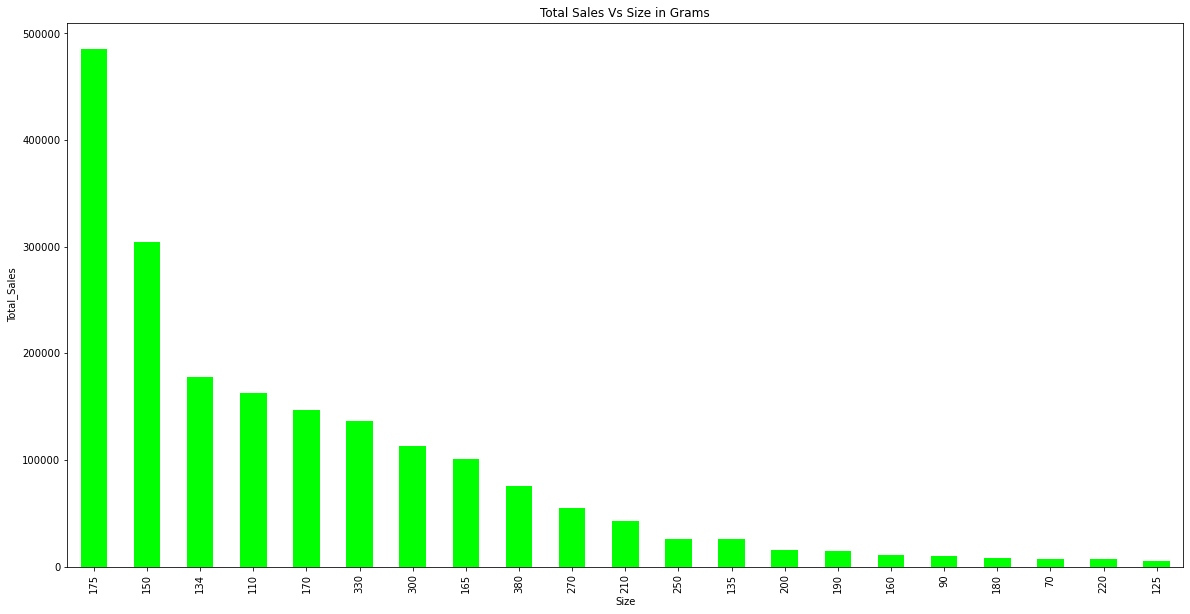

In [240]:
plt.figure(figsize=(20,10))
df.groupby(by='Size in Grams')['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='bar' , color='lime' , fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Size')
plt.ylabel('Total_Sales')
plt.title('Total Sales Vs Size in Grams')
plt.show()

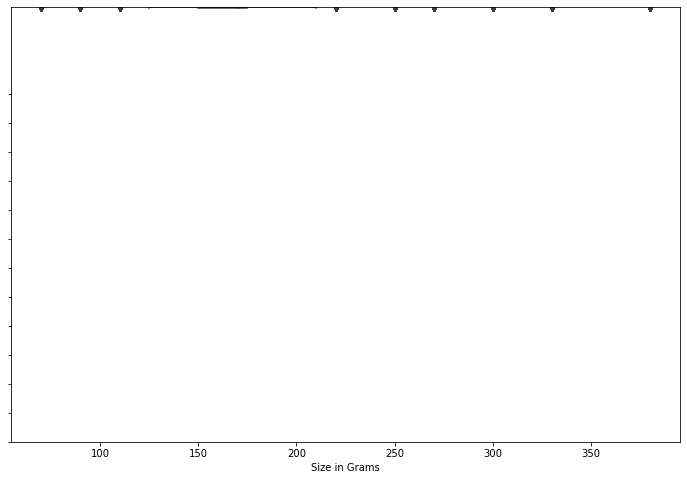

In [241]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Size in Grams'],orient='vartical',color='brown')
plt.yticks(list(range(75,400,25)))
plt.show()

> A Packet size of 175 grams is the most preffered size amongst the customer

> From the boxplot it can be seen that maximum population preffers packet size between 125 grams to 210 grams.

In [242]:
# Sales vs Date

In [243]:
df_date = pd.concat([df['DATE'] , df['TOT_SALES']] , axis=1)
df_date['MONTH'] = df_date['DATE'].dt.strftime('%y %m')
df_date['DAY'] = df_date['DATE'].dt.strftime('%A')
df_date.head()

,DATE,TOT_SALES,MONTH,DAY
0,2018-10-19,6.0,18 10,Friday
1,2018-09-18,2.7,18 09,Tuesday
2,2019-03-09,3.6,19 03,Saturday
3,2019-03-10,3.0,19 03,Sunday
4,2018-11-04,1.9,18 11,Sunday


In [244]:
s_month =  df_date.groupby(by='MONTH')['TOT_SALES'].sum()
months = ['July 18','August 18','September 18','October 18','November 18','December 18','January 19','February 19',
            'March 19','April 19','May 19','June 19','July 19']
s_days = df_date.groupby(by='DAY')['TOT_SALES'].sum()

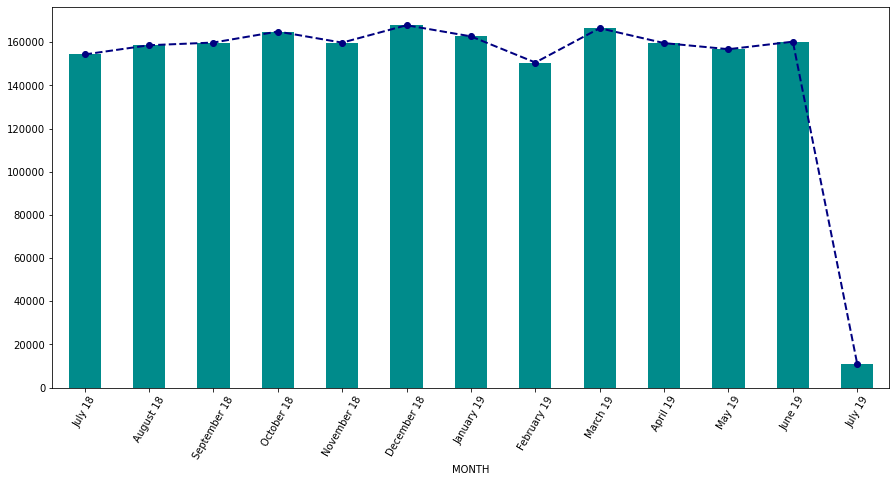

In [245]:
plt.figure(figsize=(15,7))
s_month.plot(kind='bar',color='darkcyan')
plt.plot(s_month.index ,s_month.values,label='Monthly Sales', marker='o',linestyle='--',color='navy',linewidth=2)
plt.xticks(s_month.index, months)
plt.xticks(rotation=60)
plt.show()

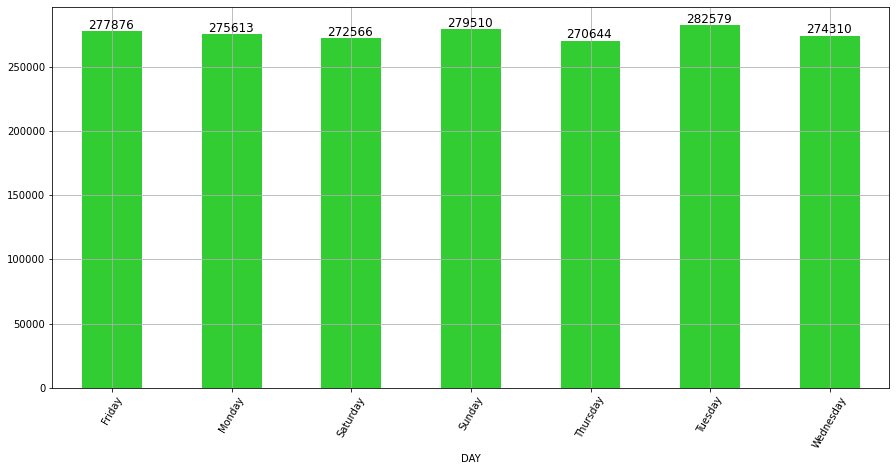

In [246]:
plt.figure(figsize=(15,7))
s_days.plot(kind='bar',color='limegreen')
for i,j in zip(list(range(7)),list(s_days.values)):
    plt.text(i-0.2 , j+2000 ,str(round(j)) , fontsize=12 )
plt.xticks(rotation=60)
plt.grid()
plt.show()

> The Month of December witnessed the maximum sales followed by March amongst all the other Months

> To our suprise, Tuesday has maximum sales more than that of Sunday.

In [247]:
# TOP 50 Customers Sales Wise

In [248]:
df_topcust = pd.DataFrame(df.groupby(by='LYLTY_CARD_NBR')['TOT_SALES'].sum().nlargest(50) , columns=['TOT_SALES']).reset_index()
df_topcust = pd.merge(df_topcust,df,on='LYLTY_CARD_NBR',how='left')

In [249]:
df_topcust  = df_topcust.drop_duplicates(subset=['LYLTY_CARD_NBR','PREMIUM_CUSTOMER'],keep='first')
df_topcust = df_topcust[['LYLTY_CARD_NBR','PREMIUM_CUSTOMER','TOT_SALES_x']]
df_topcust.head()

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,TOT_SALES_x
0,230078,Budget,138.6
17,63197,Budget,132.8
32,259009,Mainstream,127.2
47,162039,Mainstream,126.8
65,58361,Budget,124.8


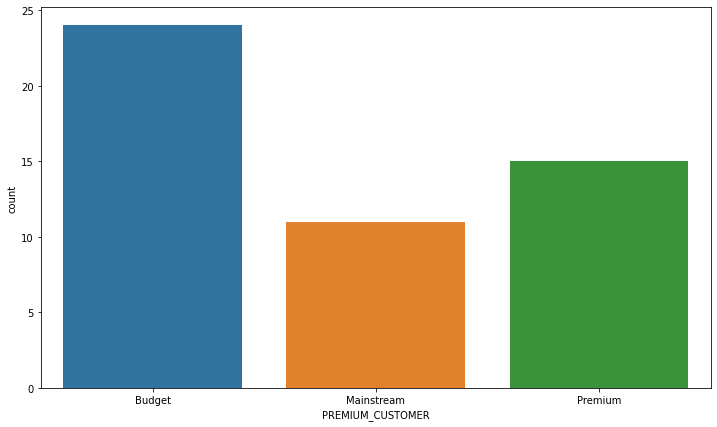

In [250]:
plt.figure(figsize=(12,7))
sns.countplot(df_topcust['PREMIUM_CUSTOMER'])
plt.show()

> 24 out of the top 50 Customers who buys Snacks belongs to Budget class of the customer that means the classification of customer which was done based on their overall buying history does not hold true when it comes to buying snacks.

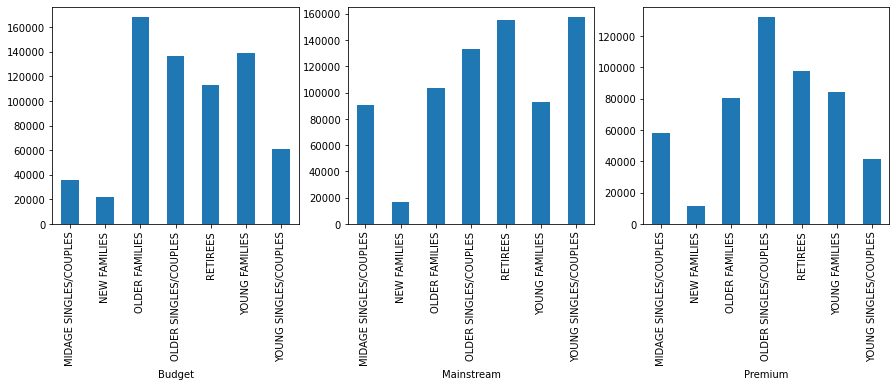

In [251]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
df.groupby(by=['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum().loc[('Budget')].plot(kind='bar')
plt.xlabel('Budget')
plt.subplot(1,3,2)
df.groupby(by=['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum().loc[('Mainstream')].plot(kind='bar')
plt.xlabel('Mainstream')
plt.subplot(1,3,3)
df.groupby(by=['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum().loc[('Premium')].plot(kind='bar')
plt.xlabel('Premium')
plt.show()

> In Budget class of Customer , Older Families have made highest sales followed by OLDER SINGLES/COUPLES and YOUNG FAMILIES.

> In Mainstream class of Customer, RETIREES have made highest sales followed by YOUNG SINGLES/COUPLES and OLDER SINGLES/COUPLES.

> In Premium class of customer, OLDER SINGLES/COUPLES have made highest sales followed by RETIREES and YOUNG FAMILIES.

> All of the classes have different Lifestage category as their best purchaser , so we can make marketing strategies accordingly.

## Statistical Tests

### Statistically checking if all the Lifestages have different sales :

In [252]:
ab = df.groupby(by='LIFESTAGE')

#### Hypothesis For Shapiro Test

> Null : Data is Normal
    
> Alteranate : Data is not Normal

In [253]:
for i in list(df['LIFESTAGE'].unique()):
    tstat,pvalue = shapiro(ab.get_group(i)['TOT_SALES'].values)
    print(i,':', pvalue)

YOUNG SINGLES/COUPLES : 0.0
YOUNG FAMILIES : 0.0
OLDER SINGLES/COUPLES : 0.0
MIDAGE SINGLES/COUPLES : 0.0
NEW FAMILIES : 1.332377355025686e-31
OLDER FAMILIES : 0.0
RETIREES : 0.0


#### Hypothesis For Kruskal Test

>Null : Median of all the classes is same
    
>Alternate : Median of all or atleast one of the classes is significantly different.

In [254]:
d = {}
for i in list(df['LIFESTAGE'].unique()):
    if i not in d:
        d[i] = list(ab.get_group(i)['TOT_SALES'].values)

In [255]:
## Performing Non- Parametric test (Kruskal) to check significant difference between the groups

stat , pval = kruskal(d['YOUNG SINGLES/COUPLES'],d['YOUNG FAMILIES'],d['OLDER SINGLES/COUPLES'],
             d['MIDAGE SINGLES/COUPLES'],d['NEW FAMILIES'],d['OLDER FAMILIES'],d['RETIREES'])

print('T-Statistic: {} \n P-value: {}'.format(stat , pval))

T-Statistic: 273.98438495256823 
 P-value: 3.0461310584480877e-56


#### As pvalue is less than 0.05, we reject null hypothesis, and we can say that, atleast one of the class is significantly different.

### Statistically checking if all the Classe of Customer have different sales :

In [256]:
xy = df.groupby(by='PREMIUM_CUSTOMER')

In [257]:
# Checking Normality by Shapiro
for i in list(df['PREMIUM_CUSTOMER'].unique()):
    tstat,pvalue = shapiro(xy.get_group(i)['TOT_SALES'].values)
    print(i,':', pvalue)

Premium : 0.0
Mainstream : 0.0
Budget : 0.0


In [258]:
d = {}
for i in list(df['PREMIUM_CUSTOMER'].unique()):
    if i not in d:
        d[i] = list(xy.get_group(i)['TOT_SALES'].values)

In [259]:
# Performing Non- Parametric test (Kruskal) to check significant difference between the groups

stat , pval = kruskal(d['Premium'],d['Mainstream'],d['Budget'])

print('T-Statistic: {} \n P-value: {}'.format(stat , pval))

T-Statistic: 116.28058186327546 
 P-value: 5.623315779100539e-26


In [260]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,natural_chipco seasalt,2,6.0,October 18,175,Natural Chip Co,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,red_rock_deli chikn&garlic aioli,1,2.7,September 18,150,Red Rock Deli,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,grain_waves sour cream&chives,1,3.6,March 19,210,Grain,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,natural_chipco hony soy chckn,1,3.0,March 19,175,Natural Chip Co,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,ww original stacked chips,1,1.9,November 18,160,WW,1.9


#### As pvalue is less than 0.05, we reject null hypothesis, and we can say that, atleast one of the class is significantly different.

In [261]:
n = pd.DataFrame(df.groupby(['Size in Grams'])['LIFESTAGE'])
print(n)

      0                                                  1
0    70  23         YOUNG SINGLES/COUPLES
33           ...
1    90  74        OLDER SINGLES/COUPLES
76        YOUN...
2   110  6          YOUNG SINGLES/COUPLES
13         OL...
3   125  142                    RETIREES
239       OLDE...
4   134  102                 NEW FAMILIES
104        OL...
5   135  20               OLDER FAMILIES
42        YOUN...
6   150  1         YOUNG SINGLES/COUPLES
7         YOUN...
7   160  4          OLDER SINGLES/COUPLES
88        MID...
8   165  5         MIDAGE SINGLES/COUPLES
22         YO...
9   170  9         YOUNG SINGLES/COUPLES
14        OLDE...
10  175  0         YOUNG SINGLES/COUPLES
3             ...
11  180  11         OLDER SINGLES/COUPLES
24         OL...
12  190  43         YOUNG SINGLES/COUPLES
109        OL...
13  200  85                      RETIREES
135        OL...
14  210  2                 YOUNG FAMILIES
175        YO...
15  220  41         YOUNG SINGLES/COUPLES
298        OL.

In [262]:
##################################################################################################################

##  Market Basket Analysis (BRANDS)

In [263]:
# Saving Transaction IDs those are having two or more transactions , in a list.
s = pd.Series(df['TXN_ID'].value_counts())
trans_id = s[s>1]
l = list(trans_id.index)

In [264]:
# Creating sepearte dataframe of above Transaction IDs 
df_trans = df[df['TXN_ID'].isin(l) ]
df_trans.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,Size in Grams,Brand,Product Price
500,1446,OLDER FAMILIES,Premium,2019-06-22,1,517,99,pringles sthrn friedchicken,2,7.4,June 19,134,Pringles,3.7
501,1446,OLDER FAMILIES,Premium,2019-06-22,1,517,9,kettle tortilla chpsbtroot&ricotta,2,9.2,June 19,150,Kettle,4.6
611,2034,YOUNG SINGLES/COUPLES,Budget,2018-12-22,2,628,95,sunbites whlegrn crisps frch/onin,1,1.7,December 18,90,Sunbites,1.7
612,2034,YOUNG SINGLES/COUPLES,Budget,2018-12-22,2,628,104,infuzions thai sweetchili potatomix,1,3.8,December 18,110,Infuzions,3.8
1113,3008,RETIREES,Budget,2018-08-28,3,1142,15,twisties cheese,2,9.2,August 18,270,Twisties,4.6


In [265]:
# Checking shape of Transaction Dataframe
df_trans.shape

(3410, 14)

In [266]:
df_basket = df_trans.groupby(['TXN_ID', 'Brand']).size().reset_index(name='count')

basket = (df_basket.groupby(['TXN_ID', 'Brand'])['count']
          .sum().unstack().fillna(0))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [267]:
basket_sets.head()

Brand,CCs,Cheetos,Cheezels,Cobs,Doritos,Grain,Infuzions,Kettle,Natural Chip Co,Old El Paso,Pringles,Red Rock Deli,Smith's,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
TXN_ID,,,,,,,,,,,,,,,,,,,
517,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
628,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1142,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1162,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1384,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [268]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Cheezels),(Kettle),0.041128,0.273208,0.011751,0.285714,1.045776,0.000514,1.017509
5,(Grain),(Kettle),0.048179,0.273208,0.011163,0.231707,0.848099,-0.001999,0.945983
6,(Natural Chip Co),(Smith's),0.064630,0.235018,0.012926,0.200000,0.851000,-0.002263,0.956228
9,(Old El Paso),(Pringles),0.066392,0.193302,0.011751,0.176991,0.915620,-0.001083,0.980181
3,(Twisties),(Doritos),0.064630,0.189189,0.010576,0.163636,0.864935,-0.001651,0.969448
8,(Pringles),(Old El Paso),0.193302,0.066392,0.011751,0.060790,0.915620,-0.001083,0.994035
2,(Doritos),(Twisties),0.189189,0.064630,0.010576,0.055901,0.864935,-0.001651,0.990754
7,(Smith's),(Natural Chip Co),0.235018,0.064630,0.012926,0.055000,0.851000,-0.002263,0.989810
0,(Kettle),(Cheezels),0.273208,0.041128,0.011751,0.043011,1.045776,0.000514,1.001967
4,(Kettle),(Grain),0.273208,0.048179,0.011163,0.040860,0.848099,-0.001999,0.992370


In [269]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift" , min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Cheezels),(Kettle),0.041128,0.273208,0.011751,0.285714,1.045776,0.000514,1.017509
0,(Kettle),(Cheezels),0.273208,0.041128,0.011751,0.043011,1.045776,0.000514,1.001967


> From above analysis of Association rule , We can say there are no two brands that are bought together which is also an indication of the fact that customers are buying only one barand at a time and are loyal to that brand.

> If we ignore lift which is less than 1 for most of the cases which is an indication of the fact that this events are mutually exclusive and just above 1 for two cases wich indicates that this two events are independent of each other then we can say that 28% of the time Cheezels brand is bought , Kettle is also bought and 23% of the time when Grain brand is bought , Kettle is also bought.

## Market Basket Analysis (SIZE)

In [270]:
df_basket2 = df_trans.groupby(['TXN_ID', 'Size in Grams']).size().reset_index(name='count')

basket2 = (df_basket2.groupby(['TXN_ID', 'Size in Grams'])['count']
          .sum().unstack().fillna(0))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets2 = basket2.applymap(encode_units)

In [271]:
basket_sets2.head()

Size in Grams,70,90,110,125,134,135,150,160,165,170,...,180,190,200,210,220,250,270,300,330,380
TXN_ID,,,,,,,,,,,,,,,,,,,,,
517,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1142,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1162,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1384,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [272]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.001, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift",min_threshold=1)
rules2.sort_values('lift', ascending = False, inplace = True)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(70),(160),0.019389,0.022914,0.001763,0.090909,3.967366,0.001318,1.074794
0,(160),(70),0.022914,0.019389,0.001763,0.076923,3.967366,0.001318,1.062329
21,(190),(220),0.035840,0.020564,0.001763,0.049180,2.391569,0.001026,1.030096
20,(220),(190),0.020564,0.035840,0.001763,0.085714,2.391569,0.001026,1.054550
4,(90),(220),0.028202,0.020564,0.001175,0.041667,2.026190,0.000595,1.022020
5,(220),(90),0.020564,0.028202,0.001175,0.057143,2.026190,0.000595,1.030695
23,(270),(250),0.042303,0.023502,0.001763,0.041667,1.772917,0.000768,1.018955
22,(250),(270),0.023502,0.042303,0.001763,0.075000,1.772917,0.000768,1.035348
14,(270),(135),0.042303,0.017039,0.001175,0.027778,1.630268,0.000454,1.011046
15,(135),(270),0.017039,0.042303,0.001175,0.068966,1.630268,0.000454,1.028637


In [286]:
 pd.plotting.parallel_coordinates(rules2,class_column=str ,color=('#556270', '#4ECDC4', '#C7F464'))

KeyError: '   antecedents consequents  antecedent support  consequent support   support  \\\n1         (70)       (160)            0.019389            0.022914  0.001763   \n0        (160)        (70)            0.022914            0.019389  0.001763   \n21       (190)       (220)            0.035840            0.020564  0.001763   \n20       (220)       (190)            0.020564            0.035840  0.001763   \n4         (90)       (220)            0.028202            0.020564  0.001175   \n5        (220)        (90)            0.020564            0.028202  0.001175   \n23       (270)       (250)            0.042303            0.023502  0.001763   \n22       (250)       (270)            0.023502            0.042303  0.001763   \n14       (270)       (135)            0.042303            0.017039  0.001175   \n15       (135)       (270)            0.017039            0.042303  0.001175   \n10       (200)       (135)            0.043478            0.017039  0.001175   \n11       (135)       (200)            0.017039            0.043478  0.001175   \n12       (210)       (135)            0.045241            0.017039  0.001175   \n13       (135)       (210)            0.017039            0.045241  0.001175   \n28       (380)       (270)            0.042891            0.042303  0.002350   \n29       (270)       (380)            0.042303            0.042891  0.002350   \n27       (380)       (250)            0.042891            0.023502  0.001175   \n26       (250)       (380)            0.023502            0.042891  0.001175   \n6        (170)       (125)            0.145123            0.014101  0.002350   \n7        (125)       (170)            0.014101            0.145123  0.002350   \n18       (200)       (190)            0.043478            0.035840  0.001763   \n19       (190)       (200)            0.035840            0.043478  0.001763   \n9        (134)       (220)            0.178026            0.020564  0.004113   \n8        (220)       (134)            0.020564            0.178026  0.004113   \n24       (250)       (330)            0.023502            0.092244  0.002350   \n25       (330)       (250)            0.092244            0.023502  0.002350   \n16       (180)       (175)            0.010576            0.424207  0.004700   \n17       (175)       (180)            0.424207            0.010576  0.004700   \n3         (70)       (170)            0.019389            0.145123  0.002938   \n2        (170)        (70)            0.145123            0.019389  0.002938   \n\n    confidence      lift  leverage  conviction  \n1     0.090909  3.967366  0.001318    1.074794  \n0     0.076923  3.967366  0.001318    1.062329  \n21    0.049180  2.391569  0.001026    1.030096  \n20    0.085714  2.391569  0.001026    1.054550  \n4     0.041667  2.026190  0.000595    1.022020  \n5     0.057143  2.026190  0.000595    1.030695  \n23    0.041667  1.772917  0.000768    1.018955  \n22    0.075000  1.772917  0.000768    1.035348  \n14    0.027778  1.630268  0.000454    1.011046  \n15    0.068966  1.630268  0.000454    1.028637  \n10    0.027027  1.586207  0.000434    1.010266  \n11    0.068966  1.586207  0.000434    1.027375  \n12    0.025974  1.524407  0.000404    1.009174  \n13    0.068966  1.524407  0.000404    1.025482  \n28    0.054795  1.295282  0.000536    1.013215  \n29    0.055556  1.295282  0.000536    1.013410  \n27    0.027397  1.165753  0.000167    1.004005  \n26    0.050000  1.165753  0.000167    1.007483  \n6     0.016194  1.148448  0.000304    1.002128  \n7     0.166667  1.148448  0.000304    1.025852  \n18    0.040541  1.131148  0.000204    1.004899  \n19    0.049180  1.131148  0.000204    1.005997  \n9     0.023102  1.123432  0.000452    1.002598  \n8     0.200000  1.123432  0.000452    1.027468  \n24    0.100000  1.084076  0.000182    1.008617  \n25    0.025478  1.084076  0.000182    1.002028  \n16    0.444444  1.047707  0.000214    1.036428  \n17    0.011080  1.047707  0.000214    1.000510  \n3     0.151515  1.044044  0.000124    1.007533  \n2     0.020243  1.044044  0.000124    1.000872  '

> The rule (70 gram) ---> (160 gram) , which means if a customer buys a packet size of 70 grams first also buys another packet of size 160 gram, has a high lift of 3.96 and a good confidence of about 10% (0.0909). The confidence indicates that for all the transactions in which 70gram packet is bought , 10% of the time another packet of 170 grams is also bought . The Lift of 3.96 incates that the probability of buying 170 gram packet after buying 70 gram packet is about 4 (3.96) times more than that of buying 170 gram packet alone.

> The rule (220 gram) ---> (190 gram) , which means if a customer buys a packet size of 220 grams first also buys another packet of size 190 gram , has a high lift of 2.39 and a good confidence of about 8.5% (0.085). The confidence indicates that for all the transactions in which 220gram packet is bought , 8.5% of the time another packet of 190 grams is also bought . The Lift of 2.39 incates that the probability of buying 190 gram packet after buying 220 gram packet is about 2.5 (2.39) times more than that of buying 190 gram packet alone.

In [273]:
#################################################################################################################

## Affinity Analysis on Clusters

### Creating Clusters 

In [274]:
#Dont run the following code , name of columns are in lowercase here. 

In [275]:
pip install Kmodes

Note: you may need to restart the kernel to use updated packages.


In [276]:
pip install Kmodes


Note: you may need to restart the kernel to use updated packages.


In [277]:
from kmodes.kprototypes import KPrototypes

In [ ]:
dfMatrix = X.to_numpy()
pd.DataFrame(dfMatrix)

In [ ]:
cost = []
for cluster in range(1, 6):
    kp = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    kp.fit_predict(dfMatrix, categorical = cat_col_pos)
    cost.append(kp.cost_)
    print('Cluster initiation: {}'.format(cluster))

In [ ]:
plt.plot(range(1,6),cost,marker='*')
plt.show()

In [ ]:
kp_final = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kp_final.fit_predict(dfMatrix, categorical = cat_col_pos)

In [ ]:
df_final  =df2.copy(deep=True)

In [ ]:
df_final['Cluster_Labels'] = kp_final.labels_

In [ ]:
# df_final.to_csv('df_final.csv')

In [ ]:
gr_labels = df_final.groupby(by='Cluster_Labels')

In [ ]:
df_final = pd.read_csv('df_final.csv')

In [ ]:
clus1 = df_final[df_final['Cluster_Labels']==0]
clus2 = df_final[df_final['Cluster_Labels']==1]
clus3 = df_final[df_final['Cluster_Labels']==2]

### Cluster 1 Analysis

In [ ]:
plt.figure(figsize=(10,4))
sales = clus1.groupby(by=['premium_customer','lifestage'])['tot_sales'].sum().sort_values(ascending=False)
sns.barplot(sales.index,sales.values)
plt.xticks(rotation=90)
plt.show()


In [ ]:
## From the above plots, it is clearly seen that Budget (Older Families) are contributing
## higher sales as compared to other lifestage.

### Total no.of Transactions by each lifestage.

In [ ]:
plt.figure(figsize=(10,4))
trans = clus1.groupby(by=['premium_customer','lifestage'])['txn_id'].count().sort_values(ascending=False)
sns.barplot(trans.index,trans.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## 'Budget' (Older Families) are having highest no.of transactions in their cluster

### Most Sold Brand

In [ ]:
plt.figure(figsize=(10,4))
brand = clus1['brand'].value_counts().sort_values(ascending=False)
sns.barplot(brand.index,brand.values,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Brand Kettle was found to be sold more in this cluster.

### Affinity to brand  

In [ ]:
## Checking which brand is preffered in Budget Older Families

In [ ]:
a1 = clus1[(clus1['lifestage'].isin(['OLDER FAMILIES'])) & (clus1['premium_customer']=='Budget')]
a2 = clus1[~(clus1['lifestage'].isin(['OLDER FAMILIES'])) & (clus1['premium_customer']=='Budget')]

l1 = a1.groupby(by='brand')[['prod_qty']].sum()
l2 = a2.groupby(by='brand')[['prod_qty']].sum()

ac1 = l1['prod_qty']/a1['prod_qty'].sum()
ac2 = l2['prod_qty']/a2['prod_qty'].sum()
ac1.name = 'tar_seg'
ac2.name = 'other_seg'

brand_prop_1 = pd.concat([ac1,ac2],names=['tar_seg','other_seg'],axis=1)
brand_prop_1['affinity'] = brand_prop_1['tar_seg']/brand_prop_1['other_seg']
brand_prop_1.sort_values(by='affinity',inplace=True)

brand_prop_1.head()

### Affinity to Packet Size

In [ ]:
m1 = a1.groupby(by='size in grams')[['prod_qty']].sum()
m2 = a2.groupby(by='size in grams')[['prod_qty']].sum()

bc1 = m1['prod_qty']/a1['prod_qty'].sum()
bc2 = m2['prod_qty']/a2['prod_qty'].sum()
bc1.name = 'tar_seg'
bc2.name = 'other_seg'

size_prop_1 = pd.concat([bc1,bc2],names=['tar_seg','other_seg'],axis=1)
size_prop_1['affinity'] = size_prop_1['tar_seg']/size_prop_1['other_seg']
size_prop_1.sort_values(by='affinity',inplace=True)

size_prop_1.head()

In [ ]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hlines(y = range(1,len(brand_prop_1.index)+1), xmin=0, xmax=brand_prop_1['affinity'])
plt.scatter(brand_prop_1['affinity'],range(1, len(brand_prop_1.index)+1))
plt.yticks(np.arange(1,len(brand_prop_1)+1),brand_prop_1.index)
plt.title('Brand')

plt.subplot(1,2,2)
plt.hlines(y = range(1,len(size_prop_1.index)+1), xmin=0, xmax=size_prop_1['affinity'])
plt.scatter(size_prop_1['affinity'],range(1, len(size_prop_1.index)+1))
plt.yticks(np.arange(1,len(size_prop_1)+1),size_prop_1.index)
plt.title('Packet_Size')
plt.show()

### Cluster 2 Analysis

#### Total Sales according to Lifestage and Premium Customer

In [ ]:
sales_1 = clus2.groupby(by=['premium_customer','lifestage'])['tot_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(sales_1.index,sales_1.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## From the above plots, it is clearly seen that Mainstream ('Young Singles/Couples') are contributing
## higher sales as compared to other lifestage.

#### Total no.of Transactions by each lifestage.

In [ ]:
trans_1 = clus2.groupby(by=['premium_customer','lifestage'])['txn_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(trans_1.index,trans_1.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Mainstream ('Young Singles/Couples') are having highest no.of transactions in their cluster.

### Most Sold Brand

In [ ]:
brand_1 = clus2['brand'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(brand_1.index,brand_1.values,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Brand Smith was found to be sold more in this cluster.

### Affinity to Brand 

In [ ]:
## Checking which brand is preffered in Mainstream Young Singles/Couples

In [ ]:
q1 = clus2[(clus2['lifestage'].isin(['YOUNG SINGLES/COUPLES'])) & (clus2['premium_customer']=='Mainstream')]
q2 = clus2[~(clus2['lifestage'].isin(['YOUNG SINGLES/COUPLES'])) & (clus2['premium_customer']=='Mainstream')]

e1 = q1.groupby(by='brand')[['prod_qty']].sum()
e2 = q2.groupby(by='brand')[['prod_qty']].sum()

ec1 = e1['prod_qty']/e1['prod_qty'].sum()
ec2 = e2['prod_qty']/e2['prod_qty'].sum()
ec1.name = 'tar_seg'
ec2.name = 'other_seg'

brand_prop_2 = pd.concat([ec1,ec2],names=['tar_seg','other_seg'],axis=1)
brand_prop_2['affinity'] = brand_prop_2['tar_seg']/brand_prop_2['other_seg']
brand_prop_2.sort_values(by='affinity',inplace=True)

brand_prop_2.head()

### Affinity to Packet Size 

In [ ]:
k1 = q1.groupby(by='size in grams')[['prod_qty']].sum()
k2 = q2.groupby(by='size in grams')[['prod_qty']].sum()

kc1 = k1['prod_qty']/q1['prod_qty'].sum()
kc2 = k2['prod_qty']/q2['prod_qty'].sum()
kc1.name = 'tar_seg'
kc2.name = 'other_seg'

size_prop_2 = pd.concat([kc1,kc2],names=['tar_seg','other_seg'],axis=1)
size_prop_2['affinity'] = size_prop_2['tar_seg']/size_prop_2['other_seg']
size_prop_2.sort_values(by='affinity',inplace=True)

size_prop_2.head()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hlines(y = range(1,len(brand_prop_2.index)+1), xmin=0, xmax=brand_prop_2['affinity'])
plt.scatter(brand_prop_2['affinity'],range(1, len(brand_prop_2.index)+1))
plt.yticks(np.arange(1,len(brand_prop_2)+1),brand_prop_2.index)
plt.title('Brand')

plt.subplot(1,2,2)
plt.hlines(y = range(1,len(size_prop_2.index)+1), xmin=0, xmax=size_prop_2['affinity'])
plt.scatter(size_prop_2['affinity'],range(1, len(size_prop_2.index)+1))
plt.yticks(np.arange(1,len(size_prop_2)+1),size_prop_2.index)
plt.title('Packet_Size')
plt.show()

In [ ]:
clus2[clus2['size in grams'] == 270]['brand'].value_counts()

In [ ]:
clus2[clus2['size in grams'] == 380]['brand'].value_counts()

## Cluster 3 Analysis

#### Total Sales according to Lifestage and Premium Customer

In [ ]:
sales_2 = clus3.groupby(by=['premium_customer','lifestage'])['tot_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(sales_2.index,sales_2.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## From the above plots, it is clearly seen that Mainstream ('Young Singles/Couples') are contributing
## higher sales as compared to other lifestage.

#### Total no.of Transactions by each lifestage.

In [ ]:
trans_2 = clus3.groupby(by=['premium_customer','lifestage'])['txn_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(trans_2.index,trans_2.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Mainstream ('Young Singles/Couples') are having highest no.of transactions in their cluster.

### Most Sold Brand

In [ ]:
brand_2 = clus3['brand'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(brand_2.index,brand_2.values,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Brand Pringles was found to be sold more in this cluster.

### Affinity to Brand

In [ ]:
## Checking which brand is preffered in Mainstream Young Singles/Couples

In [ ]:
r1 = clus3[(clus3['lifestage'].isin(['YOUNG SINGLES/COUPLES'])) & (clus3['premium_customer']=='Mainstream')]
r2 = clus3[~(clus3['lifestage'].isin(['YOUNG SINGLES/COUPLES'])) & (clus3['premium_customer']=='Mainstream')]

d1 = r1.groupby(by='brand')[['prod_qty']].sum()
d2 = r2.groupby(by='brand')[['prod_qty']].sum()

dc1 = d1['prod_qty']/r1['prod_qty'].sum()
dc2 = d2['prod_qty']/r2['prod_qty'].sum()
dc1.name = 'tar_seg'
dc2.name = 'other_seg'

brand_prop_3 = pd.concat([dc1,dc2],names=['tar_seg','other_seg'],axis=1)
brand_prop_3['affinity'] = brand_prop_3['tar_seg']/brand_prop_3['other_seg']
brand_prop_3.sort_values(by='affinity',inplace=True)

brand_prop_3.head()

### Affinity to Packet Size

In [ ]:
j1 = r1.groupby(by='size in grams')[['prod_qty']].sum()
j2 = r2.groupby(by='size in grams')[['prod_qty']].sum()

jc1 = j1['prod_qty']/r1['prod_qty'].sum()
jc2 = j2['prod_qty']/r2['prod_qty'].sum()
jc1.name = 'tar_seg'
jc2.name = 'other_seg'

size_prop_3 = pd.concat([jc1,jc2],names=['tar_seg','other_seg'],axis=1)
size_prop_3['affinity'] = size_prop_3['tar_seg']/size_prop_3['other_seg']
size_prop_3.sort_values(by='affinity',inplace=True)

size_prop_3.head()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hlines(y = range(1,len(brand_prop_3.index)+1), xmin=0, xmax=brand_prop_3['affinity'])
plt.scatter(brand_prop_3['affinity'],range(1, len(brand_prop_3.index)+1))
plt.yticks(np.arange(1,len(brand_prop_3)+1),brand_prop_3.index)
plt.title('Brand')

plt.subplot(1,2,2)
plt.hlines(y = range(1,len(size_prop_3.index)+1), xmin=0, xmax=size_prop_3['affinity'])
plt.scatter(size_prop_3['affinity'],range(1, len(size_prop_3.index)+1))
plt.yticks(np.arange(1,len(size_prop_3)+1),size_prop_3.index)
plt.title('Packet_Size')
plt.show()

In [ ]:
clus3[clus3['size in grams']==134]['brand'].value_counts()

In [ ]:
clus3[clus3['size in grams']==110]['brand'].value_counts()

In [ ]:
## AS we can see  that for Cluster 3 Mainstream Young SIngle/Couples more prefer
## brands like 'Pringles','Infuzions'
## and prefer packet_size of '134' and '110'.